In [168]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re 

#### Data Mining - Web Scraping

In [169]:
url = 'https://bina.az/items/all?page=1'
page = requests.get(url)

In [170]:
html = BeautifulSoup(page.content, 'html.parser')

In [171]:
homes = html.find_all('div', class_ = 'card_params')

In [172]:
home_info = re.sub('<[^>]+>', '-', str(homes[0])).split('---')

In [173]:
home_info

['',
 '-129 000--AZN',
 '-28 May m.',
 '1 otaqlı--58 m²--8/16 mərtəbə',
 '-Bakı, bugün 00:12',
 '']

In [174]:
binaaz_data = pd.DataFrame()

In [175]:

for page_number in range(1,2250):
    url = f'https://bina.az/items/all?page={page_number}'

    page = requests.get(url)

    # convert to html
    html = BeautifulSoup(page.content, 'html.parser')

    homes = html.find_all('div', class_ = 'card_params')
    for i in range(0,23):
        try:
            home_info = re.sub('<[^>]+>', '-', str(homes[i])).split('---')
            price = home_info[1]
            if '/gün' in str(home_info):
                sell_type = 'Günlük'
                price = price.replace('-','').replace('AZN','').replace(' ','').split('/')[0]
            elif 'ay' in str(home_info):
                sell_type = 'Aylıq'
                price = price.replace('-','').replace('AZN','').replace(' ','').split('/')[0]
            else:
                sell_type = 'Satış'
                price = int(price.replace('-','').replace('AZN','').replace(' ',''))

            region = home_info[2].replace('-','').strip()
            
            
            if (home_info[3]).count('--') == 0:
                room_count = 0
                floor = 0
                kvm = home_info[3]
            elif (home_info[3]).count('--') == 1:
                floor = 0
                room_count = int(home_info[3].split('--')[0].split(' ')[0])
                kvm = kvm = home_info[3].split('--')[1]
            else:
                room_count = int(home_info[3].split('--')[0].split(' ')[0])
                kvm = kvm = home_info[3].split('--')[1]
                floor = int(home_info[3].split('--')[2].split('/')[0])



           

            binaaz_data = binaaz_data.append({
                'Price':price,
                'Sale_Type':sell_type,
                'Location':region,
                'Number_of_rooms':room_count,
                'KvM':kvm,
                'Floor':floor}, ignore_index = True)
        except:
            continue


In [176]:
binaaz_data

,Floor,KvM,Location,Number_of_rooms,Price,Sale_Type
0,8.0,58 m²,28 May m.,1.0,129000,Aylıq
1,1.0,80 m²,Qara Qarayev m.,3.0,125000,Aylıq
2,0.0,510 m²,Sumqayıt,0.0,4500,Aylıq
3,0.0,530 m²,Elmlər Akademiyası m.,0.0,2700000,Satış
4,4.0,58 m²,Memar Əcəmi m.,2.0,87000,Satış
...,...,...,...,...,...,...
51722,4.0,145 m²,Şah İsmayıl Xətai m.,3.0,250000,Aylıq
51723,3.0,120 m²,Nərimanov r.,3.0,215000,Satış
51724,2.0,52 m²,28 May m.,1.0,95000,Aylıq
51725,10.0,130 m²,Nəriman Nərimanov m.,3.0,274900,Satış


In [316]:
df=binaaz_data.copy()

In [317]:

df

,Floor,KvM,Location,Number_of_rooms,Price,Sale_Type
0,8.0,58 m²,28 May m.,1.0,129000,Aylıq
1,1.0,80 m²,Qara Qarayev m.,3.0,125000,Aylıq
2,0.0,510 m²,Sumqayıt,0.0,4500,Aylıq
3,0.0,530 m²,Elmlər Akademiyası m.,0.0,2700000,Satış
4,4.0,58 m²,Memar Əcəmi m.,2.0,87000,Satış
...,...,...,...,...,...,...
51722,4.0,145 m²,Şah İsmayıl Xətai m.,3.0,250000,Aylıq
51723,3.0,120 m²,Nərimanov r.,3.0,215000,Satış
51724,2.0,52 m²,28 May m.,1.0,95000,Aylıq
51725,10.0,130 m²,Nəriman Nərimanov m.,3.0,274900,Satış


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51727 entries, 0 to 51726
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Floor            51727 non-null  float64
 1   KvM              51727 non-null  object 
 2   Location         51727 non-null  object 
 3   Number_of_rooms  51727 non-null  float64
 4   Price            51727 non-null  object 
 5   Sale_Type        51727 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [319]:
df['KvM_']=df['KvM'].str.split(' ',expand=True)[0]

In [320]:
df=df.drop('KvM',axis=1)

In [321]:
df['KvM_']=df['KvM_'].astype(float)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51727 entries, 0 to 51726
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Floor            51727 non-null  float64
 1   Location         51727 non-null  object 
 2   Number_of_rooms  51727 non-null  float64
 3   Price            51727 non-null  object 
 4   Sale_Type        51727 non-null  object 
 5   KvM_             51727 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


In [323]:
df['Price']=df['Price'].astype(int)

In [324]:
df.describe()

,Floor,Number_of_rooms,Price,KvM_
count,51727.000000,51727.000000,5.172700e+04,5.172700e+04
mean,5.650840,2.561332,2.230401e+05,2.589598e+02
std,5.537635,1.791230,6.989953e+05,1.011674e+04
min,0.000000,0.000000,1.000000e+01,1.000000e-01
25%,0.000000,2.000000,4.200000e+04,7.000000e+01
50%,4.000000,3.000000,1.250000e+05,1.000000e+02
75%,9.000000,3.000000,2.250000e+05,1.550000e+02
max,27.000000,20.000000,4.680000e+07,2.000000e+06


In [325]:
df.corr()

,Floor,Number_of_rooms,Price,KvM_
Floor,1.000000,0.161305,-0.083579,-0.014317
Number_of_rooms,0.161305,1.000000,0.003195,-0.012170
Price,-0.083579,0.003195,1.000000,0.050733
KvM_,-0.014317,-0.012170,0.050733,1.000000


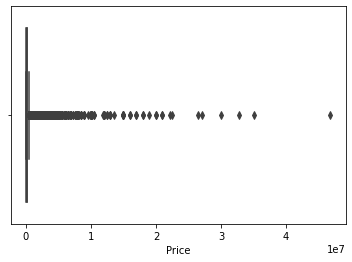

In [326]:
import seaborn as sns
sns.boxplot(x=df['Price']) 
price=df['Price']

In [327]:
df1=df[df['Sale_Type']=='Satış']

In [328]:
df1

,Floor,Location,Number_of_rooms,Price,Sale_Type,KvM_
3,0.0,Elmlər Akademiyası m.,0.0,2700000,Satış,530.0
4,4.0,Memar Əcəmi m.,2.0,87000,Satış,58.0
6,0.0,Nardaran q.,0.0,67000,Satış,12.0
8,0.0,Quba,0.0,420000,Satış,153.0
9,0.0,Masazır q.,4.0,80000,Satış,160.0
...,...,...,...,...,...,...
51717,3.0,Elmlər Akademiyası m.,3.0,275000,Satış,125.0
51718,5.0,Nərimanov r.,3.0,250000,Satış,120.0
51719,9.0,Həzi Aslanov m.,3.0,82000,Satış,65.0
51723,3.0,Nərimanov r.,3.0,215000,Satış,120.0


<AxesSubplot:xlabel='Price'>

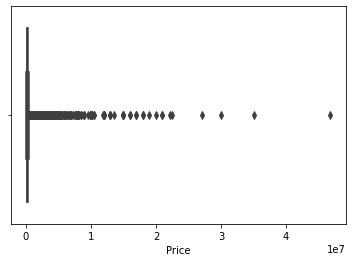

In [329]:
sns.boxplot(x=df1['Price'])

In [330]:
Q1=price.quantile(0.25) 
Q3=price.quantile(0.75)
IQR=Q3-Q1 

In [331]:
IQR

183000.0

In [332]:
Q1

42000.0

In [333]:
Q3

225000.0

In [334]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [335]:
lower_limit

-232500.0

In [336]:
upper_limit

499500.0

In [337]:
df1=df1[(df1['Price']<=upper_limit)&(df1['Price']>=Q1)]

In [338]:
df1

,Floor,Location,Number_of_rooms,Price,Sale_Type,KvM_
4,4.0,Memar Əcəmi m.,2.0,87000,Satış,58.0
6,0.0,Nardaran q.,0.0,67000,Satış,12.0
8,0.0,Quba,0.0,420000,Satış,153.0
9,0.0,Masazır q.,4.0,80000,Satış,160.0
10,4.0,Xırdalan,2.0,52000,Satış,57.0
...,...,...,...,...,...,...
51717,3.0,Elmlər Akademiyası m.,3.0,275000,Satış,125.0
51718,5.0,Nərimanov r.,3.0,250000,Satış,120.0
51719,9.0,Həzi Aslanov m.,3.0,82000,Satış,65.0
51723,3.0,Nərimanov r.,3.0,215000,Satış,120.0


In [339]:
kvm_=df['KvM_']

In [340]:
Q1=kvm_.quantile(0.25) 
Q3=kvm_.quantile(0.75)
IQR=Q3-Q1 

In [341]:
IQR

85.0

In [342]:
Q1

70.0

In [343]:
Q3

155.0

In [344]:
lower_limit_kvm=Q1-1.5*IQR
upper_limit_kvm=Q3+1.5*IQR

In [345]:
lower_limit_kvm

-57.5

In [346]:
upper_limit_kvm

282.5

In [347]:
df1=df1[df1['KvM_']<=upper_limit_kvm]

In [348]:
df1

,Floor,Location,Number_of_rooms,Price,Sale_Type,KvM_
4,4.0,Memar Əcəmi m.,2.0,87000,Satış,58.0
6,0.0,Nardaran q.,0.0,67000,Satış,12.0
8,0.0,Quba,0.0,420000,Satış,153.0
9,0.0,Masazır q.,4.0,80000,Satış,160.0
10,4.0,Xırdalan,2.0,52000,Satış,57.0
...,...,...,...,...,...,...
51717,3.0,Elmlər Akademiyası m.,3.0,275000,Satış,125.0
51718,5.0,Nərimanov r.,3.0,250000,Satış,120.0
51719,9.0,Həzi Aslanov m.,3.0,82000,Satış,65.0
51723,3.0,Nərimanov r.,3.0,215000,Satış,120.0


In [349]:
number_rooms=df1['Number_of_rooms']

In [350]:
Q1=number_rooms.quantile(0.25) 
Q3=number_rooms.quantile(0.75)
IQR=Q3-Q1 

In [351]:
IQR

1.0

In [352]:
Q1

2.0

In [353]:
Q3

3.0

In [354]:
lower_limit_rooms=Q1-1.5*IQR
upper_limit_rooms=Q3+1.5*IQR

In [355]:
lower_limit_rooms

0.5

In [356]:
upper_limit_rooms=round(upper_limit_rooms)


In [357]:
df1=df1[df1['Number_of_rooms']<=upper_limit_rooms]

In [358]:
df1.corr()

,Floor,Number_of_rooms,Price,KvM_
Floor,1.000000,0.311088,0.111674,0.072412
Number_of_rooms,0.311088,1.000000,0.134552,0.308222
Price,0.111674,0.134552,1.000000,0.682385
KvM_,0.072412,0.308222,0.682385,1.000000


#### Data Modelling


In [359]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

In [360]:
encoder=LabelEncoder()

In [361]:
df1['Sale_Type_encoder']=encoder.fit_transform(df1['Sale_Type'])
df1['Location_encoder']=encoder.fit_transform(df1['Location'])


<ipython-input-361-57415ea8ebdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sale_Type_encoder']=encoder.fit_transform(df1['Sale_Type'])
<ipython-input-361-57415ea8ebdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Location_encoder']=encoder.fit_transform(df1['Location'])


In [362]:
df1

,Floor,Location,Number_of_rooms,Price,Sale_Type,KvM_,Sale_Type_encoder,Location_encoder
4,4.0,Memar Əcəmi m.,2.0,87000,Satış,58.0,0,66
6,0.0,Nardaran q.,0.0,67000,Satış,12.0,0,72
8,0.0,Quba,0.0,420000,Satış,153.0,0,93
9,0.0,Masazır q.,4.0,80000,Satış,160.0,0,59
10,4.0,Xırdalan,2.0,52000,Satış,57.0,0,119
...,...,...,...,...,...,...,...,...
51717,3.0,Elmlər Akademiyası m.,3.0,275000,Satış,125.0,0,35
51718,5.0,Nərimanov r.,3.0,250000,Satış,120.0,0,79
51719,9.0,Həzi Aslanov m.,3.0,82000,Satış,65.0,0,46
51723,3.0,Nərimanov r.,3.0,215000,Satış,120.0,0,79


In [363]:
X=df1.loc[:,['Floor','Number_of_rooms','Sale_Type_encoder','Location_encoder','KvM_']].values
Y=df1['Price'].values

In [364]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [365]:
rf=RandomForestRegressor().fit(X_train,Y_train)

tree=DecisionTreeRegressor().fit(X_train,Y_train)

knn=KNeighborsRegressor().fit(X_train,Y_train)

bagging=BaggingRegressor().fit(X_train,Y_train)

xgb=XGBRegressor().fit(X_train,Y_train)

gbm=GradientBoostingRegressor().fit(X_train,Y_train)

lgbm=LGBMRegressor().fit(X_train,Y_train)

cat=CatBoostRegressor(verbose=False).fit(X_train,Y_train)

In [366]:
modeller = [
    knn,
    rf,
    gbm,
    cat,
    lgbm,
    xgb,
    tree,
    bagging
    
]
for model in modeller:
    adlar = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluq = r2_score(Y_test, y_pred)
    print("-"*28)
    print(adlar + ":" )
    print("Accuracy: {:.4%}".format(dogruluq))

----------------------------
KNeighborsRegressor:
Accuracy: 69.4399%
----------------------------
RandomForestRegressor:
Accuracy: 75.5501%
----------------------------
GradientBoostingRegressor:
Accuracy: 70.0133%
----------------------------
CatBoostRegressor:
Accuracy: 75.5297%
----------------------------
LGBMRegressor:
Accuracy: 74.6432%
----------------------------
XGBRegressor:
Accuracy: 76.3915%
----------------------------
DecisionTreeRegressor:
Accuracy: 65.8269%
----------------------------
BaggingRegressor:
Accuracy: 74.1121%


In [367]:
params={'verbose':False}
rf_cv=cross_val_score(X = X_train,y = Y_train, estimator = rf, cv = 10)

tree_cv=cross_val_score(X = X_train,y = Y_train, estimator = tree, cv = 10)

knn_cv=cross_val_score(X = X_train,y = Y_train, estimator = knn, cv = 10)

bagging_cv=cross_val_score(X = X_train,y = Y_train, estimator = bagging, cv = 10)

xgb_cv=cross_val_score(X = X_train,y = Y_train, estimator = xgb, cv = 10)

gbm_cv=cross_val_score(X = X_train,y = Y_train, estimator = gbm, cv = 10)

lgbm_cv=cross_val_score(X = X_train,y = Y_train, estimator = lgbm, cv = 10)

cat_cv=cross_val_score(X = X_train,y = Y_train, estimator = cat, cv = 10,fit_params=params);

In [368]:
print(knn_cv.mean())
print(rf_cv.mean())
print(gbm_cv.mean())
print(cat_cv.mean())
print(lgbm_cv.mean())
print(xgb_cv.mean())
print(tree_cv.mean())
print(bagging_cv.mean())

0.6898105921803384
0.7535255882202962
0.7065261291460659
0.7671125279930392
0.7589984646154845
0.7691542018419228
0.6441029611734098
0.7403349464446066


In [254]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [255]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [257]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500}

In [369]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,Y_train)
y_pred = xgb_tuned.predict(X_test)

In [370]:
r2_score(Y_test,y_pred)

0.770036347829822

In [371]:
np.sqrt(mean_squared_error(Y_test,y_pred))

45054.475508509415

In [372]:
Y.std()

94478.81757106258

In [373]:
X=df1.loc[:,['Floor','Number_of_rooms','Sale_Type_encoder','Location_encoder','KvM_']].values
Y=df1['Price'].values

In [374]:
df1.corr()

,Floor,Number_of_rooms,Price,KvM_,Sale_Type_encoder,Location_encoder
Floor,1.000000,0.311088,0.111674,0.072412,NaN,0.055893
Number_of_rooms,0.311088,1.000000,0.134552,0.308222,NaN,-0.014925
Price,0.111674,0.134552,1.000000,0.682385,NaN,-0.034068
KvM_,0.072412,0.308222,0.682385,1.000000,NaN,-0.016704
Sale_Type_encoder,NaN,NaN,NaN,NaN,NaN,NaN
Location_encoder,0.055893,-0.014925,-0.034068,-0.016704,NaN,1.000000


In [375]:
df1.describe()

,Floor,Number_of_rooms,Price,KvM_,Sale_Type_encoder,Location_encoder
count,28280.000000,28280.000000,28280.000000,28280.000000,28280.0,28280.000000
mean,6.287907,2.417680,170021.053925,100.959512,0.0,81.840559
std,5.417620,1.157744,94480.488033,49.166609,0.0,42.358754
min,0.000000,0.000000,42000.000000,0.100000,0.0,0.000000
25%,2.000000,2.000000,98000.000000,65.000000,0.0,50.750000
50%,5.000000,3.000000,145000.000000,93.000000,0.0,79.000000
75%,10.000000,3.000000,220000.000000,130.000000,0.0,121.000000
max,27.000000,4.000000,499000.000000,280.500000,0.0,154.000000


#### Automation

In [377]:
sale='Satış'
location1='Nərimanov r.'
number_of_rooms=3
floor=3
kvm=100




In [384]:
def prediction_price(sale,location,number_of_rooms,floor,kvm):
    
    test_data=pd.DataFrame()
    
    sale_type_encoder=df1[df1['Sale_Type']==sale]['Sale_Type_encoder'].values[0]
    location_encoder=df1[df1['Location']==location1]['Location_encoder'].values[0]
    
    
    test_data=test_data.append({'Number_of_rooms':number_of_rooms,
                               'Floor':floor,
                               'KvM_':kvm,
                                'Location_encoder':location_encoder,
                                'Sale_type_encoder':sale_type_encoder
                                
                               },ignore_index=True )
    
    X_train = df1.loc[:,['Floor','Number_of_rooms','Sale_Type_encoder','Location_encoder','KvM_']].values
    Y_train=df1['Price'].values
    xgb_tuned.fit(X_train,Y_train)
    y_pred=xgb_tuned.predict(test_data.values)[0]
    
    return y_pred
    
    

In [385]:
prediction_price('Satış','Nizami m.',3,3,100)

146791.97